set()
False
   00  000  0000  00000031  000035  00006  ...  ما  محاولات  من  هذا  والمرضى  ยงade
0   0    0     0         0       0      0  ...   0        0   0    0        0      0
1   0    0     0         0       0      0  ...   0        0   0    0        0      0
2   0    0     0         0       0      0  ...   0        0   0    0        0      0
3   0    0     0         0       0      0  ...   0        0   0    0        0      0
4   0    0     0         0       0      0  ...   0        0   0    0        0      0

[5 rows x 56922 columns]
    00  000  0000  00000031  000035  ...  محاولات   من  هذا  والمرضى  ยงade
0  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
1  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
2  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
3  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
4  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892
FAKE -5.10399283643309 2016
FAKE -4.298759458437704 october
FAKE -4.02336678032355 hillary
FAKE -3.2404017075308715 share
FAKE -3.0283218510279224 article
FAKE -2.7940048058398927 november
FAKE -2.6379236037007683 print
FAKE -2.401179287562009 mosul
FAKE -2.347930043658285 oct
FAKE -2.3348877347116583 email
FAKE -2.2285118633475816 war
FAKE -2.1869275619186626 podesta
FAKE -2.173205332693067 advertisement
FAKE -2.0377347314705023 establishment
FAKE -1.9753086315672683 wikileaks
FAKE -1.9500467011112408 26
FAKE -1.9186406077532943 nov
FAKE -1.9008718906383018 election
FAKE -1.862099699217602 source
FAKE -1.853504051326198 com
FAKE -1.8323500580102807 corporate
FAKE -1.7821775049757798 brexit
FAKE -1.7391463329446577 jewish
FAKE -1.7256357354181198 ayotte
FAKE -1.690858775690996 fbi
FAKE -1.68820906073

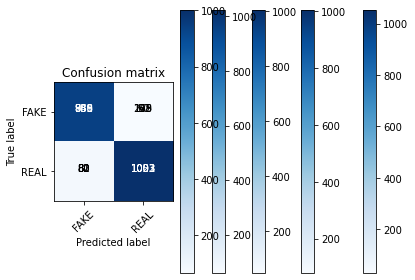

In [11]:
#--------------------------------------------------------------
# Include Libraries
#--------------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
#import pandas_ml as pdml
import sklearn.datasets as datasets
#from pandas_ml import ConfusionMatrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import HashingVectorizer
import itertools
import numpy as np


#--------------------------------------------------------------
# Importing dataset using pandas dataframe
#--------------------------------------------------------------
df = pd.read_csv("/content/fake_or_real_news.csv")
    
# Inspect shape of `df` 
df.shape

# Print first lines of `df` 
df.head()

# Set index 
df = df.set_index("Unnamed: 0")

# Print first lines of `df` 
df.head()


#--------------------------------------------------------------
# Separate the labels and set up training and test datasets
#--------------------------------------------------------------
y = df.label 

# Drop the `label` column
df.drop("label", axis=1)      #where numbering of news article is done that column is dropped in dataset

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)


#--------------------------------------------------------------
# Building the Count and Tfidf Vectors
#--------------------------------------------------------------

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train)                  # Learn the vocabulary dictionary and return term-document matrix.

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)    # This removes words which appear in more than 70% of the articles

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Get the feature names of `tfidf_vectorizer` 
#print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
#print(count_vectorizer.get_feature_names()[:10])

count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

difference = set(count_df.columns) - set(tfidf_df.columns)

print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

print(count_df.head())

print(tfidf_df.head())


#--------------------------------------------------------------
# Function to plot the confusion matrix 
#--------------------------------------------------------------

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#--------------------------------------------------------------
# Naive Bayes classifier for Multinomial model 
#--------------------------------------------------------------

clf = MultinomialNB() 

clf.fit(tfidf_train, y_train)                       # Fit Naive Bayes classifier according to X, y

pred = clf.predict(tfidf_test)                     # Perform classification on an array of test vectors X.
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


clf = MultinomialNB()

clf.fit(count_train, y_train)

pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


#--------------------------------------------------------------
# Applying Passive Aggressive Classifier
#--------------------------------------------------------------

linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


clf = MultinomialNB(alpha=0.1)               # Additive (Laplace/Lidstone) smoothing parameter

last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))


def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):       # inspect the top 30 vectors for fake and real news
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()                                            # Array mapping from feature integer indices to feature name
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)
feature_names = tfidf_vectorizer.get_feature_names()

### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]                               # clearly there are certain words which might show political intent and source in the top fake features (such as the words corporate and establishment).

tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))
#print(tokens_with_weights)

#--------------------------------------------------------------
# HashingVectorizer : require less memory and are faster (because they are sparse and use hashes rather than tokens)
#--------------------------------------------------------------


hash_vectorizer = HashingVectorizer(stop_words='english', binary='True')
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

#--------------------------------------------------------------
# Naive Bayes classifier for Multinomial model 
#-------------------------------------------------------------- 

clf = MultinomialNB(alpha=.01)

clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


#--------------------------------------------------------------
# Applying Passive Aggressive Classifier
#--------------------------------------------------------------

clf = PassiveAggressiveClassifier(max_iter=50)    

clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)